In [53]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

In [54]:
data = sio.loadmat('ex3data1.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [55]:
type(data)

dict

In [56]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [57]:
raw_X = data['X']
raw_y = data['y']
raw_X.shape


(5000, 400)

In [58]:
raw_y.shape

(5000, 1)

In [59]:
def plot_an_image(X):
    pick_one = np.random.randint(5000)

    image = X[pick_one,:]

    fig,ax = plt.subplots(figsize=(1,1))
    ax.imshow(image.reshape(20,20).T,cmap='gray_r')
    
    plt.xticks([])
    plt.yticks([])

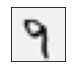

In [60]:
plot_an_image(raw_X)

In [61]:
def plot_100_image(X):
    sample_index = np.random.choice(len(X),100)
    images = X[sample_index,:]
    print(images.shape)

    fig,ax= plt.subplots(ncols=10,nrows=10,figsize=(8,8),sharex=True,sharey=True)

    for r in range(10):
        for c in range(10):
            ax[r,c].imshow(images[10*r+c].reshape(20,20).T,cmap='gray_r')
    plt.xticks([])
    plt.yticks([])
    plt.show()

(100, 400)


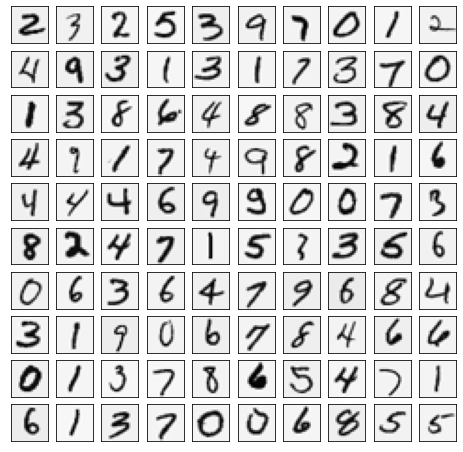

In [62]:
plot_100_image(raw_X)

In [63]:
def sigmiod(z):
    return 1/(1+np.exp(-z))

In [64]:
def costFunction(theta,X,y,lamda):
    A = sigmiod(X@theta)
    first = y*np.log(A)
    second = (1-y)*np.log(1-A)
    # reg = np.sum(np.power(theta[1:],2))*(lamda/(2*len(X)))
    reg = theta[1:]@theta[1:]*(lamda/(2*len(X)))
    return -np.sum(first + second)/len(X)+reg

In [65]:
def gradientDescent(X,y,theta,alpha,iters,lamda):
    costs = []

    for i in range(iters):

        reg = theta[1:]*int(lamda/len(X))
        reg = np.insert(reg,0,values=0,axis=0)

        theta = theta-(X.T@(sigmiod(X@theta)-y))*alpha/len(X)-reg
        cost = costFunction(X,y,theta,lamda)
        costs.append(cost)
        if i% 1000 ==0:
            print(cost)
    return theta,costs

In [66]:
def gradient_reg(theta,X,y,lamda):
        reg = theta[1:]*int(lamda/len(X))
        reg = np.insert(reg,0,values=0,axis=0)
        first = (X.T@sigmiod(X@theta))/len(X)
        return first + reg

In [67]:
X = np.insert(raw_X,0,1,1)
X.shape

(5000, 401)

In [68]:
y = raw_y.flatten()
y.shape

(5000,)

In [69]:
from scipy.optimize import minimize

In [70]:
def one_vs_all(X,y,lamda,K):

    n = X.shape[1]

    theta_all = np.zeros((K,n))

    for i in range(1,K+1):
       theta_i = np.zeros(n,)
       res = minimize(fun=costFunction,x0=theta_i,args=(X,y==i,lamda),method='TNC',jac=gradient_reg)
       theta_all[i-1,:]=res.x
    return theta_all

In [71]:
lamda = 1
K = 10

In [72]:
theta_final = one_vs_all(X,y,lamda,K)
theta_final

array([[-2.34508839e-01,  0.00000000e+00,  0.00000000e+00, ...,
        -6.84294984e-07, -1.84770202e-08,  0.00000000e+00],
       [-2.27907355e-01,  0.00000000e+00,  0.00000000e+00, ...,
        -6.37512903e-07, -2.89900506e-08,  0.00000000e+00],
       [-3.98330104e-01,  0.00000000e+00,  0.00000000e+00, ...,
        -8.67693353e-07, -4.67664045e-08,  0.00000000e+00],
       ...,
       [-2.36137951e-01,  0.00000000e+00,  0.00000000e+00, ...,
        -6.34806413e-07, -4.01109684e-08,  0.00000000e+00],
       [-2.27907355e-01,  0.00000000e+00,  0.00000000e+00, ...,
        -6.37512903e-07, -2.89900506e-08,  0.00000000e+00],
       [-2.34508839e-01,  0.00000000e+00,  0.00000000e+00, ...,
        -6.84294984e-07, -1.84770202e-08,  0.00000000e+00]])

In [73]:
def predict(X,theta_final):
    h = sigmiod(X@theta_final.T)
    h_argmax = np.argmax(h,axis=1)
    return h_argmax+1

In [74]:
y_predict = predict(X,theta_final)
acc = np.mean(y_predict==y)
acc

0.1